In [2]:
import cv2
import numpy as np
import torch
import torchvision.transforms.v2 as T
import torchvision.transforms.v2.functional as TF
import random
from PIL import Image
import matplotlib.pyplot as plt

random.seed(2025)
torch.manual_seed(2025)
plt.rcParams["savefig.bbox"] = 'tight'

# Implement functions

In [3]:
def flip_horizontal(image, mask):
    image = TF.hflip(image)
    mask = TF.hflip(mask)
    return image, mask

def flip_vertical(image, mask):
    image = TF.vflip(image)
    mask = TF.vflip(mask)
    return image, mask

In [7]:
def rotate(image, mask, max_angle=30.):
    rotate_angle = random.uniform(-max_angle, max_angle)  
    image = TF.rotate(image, rotate_angle)
    mask = TF.rotate(mask, rotate_angle)
    return image, mask

In [12]:
def translate(image, mask, max_shift=0.2):
    shift_x = random.uniform(-max_shift, max_shift) * image.width
    shift_y = random.uniform(-max_shift, max_shift) * image.height

    image = TF.affine(image, translate=(shift_x, shift_y), scale=1, angle=0, shear=0)
    mask = TF.affine(mask, translate=(shift_x, shift_y), scale=1, angle=0, shear=0)

    return image, mask

In [69]:
def elastic_transform(image, mask, alpha=50.0, sigma=5.0):
    image = T.ToTensor()(image)
    mask = T.ToTensor()(mask)

    transform = T.ElasticTransform(alpha=alpha, sigma=sigma)
    image = transform(image)
    mask = transform(mask)

    image = T.ToPILImage()(image)
    mask = T.ToPILImage()(mask)

    return image, mask

In [50]:
def color_jitter(image, mask):
    transform = T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2)
    image = transform(image)
    
    return image, mask

In [51]:
def random_crop(image, mask, crop_size=(200, 200)):
    top, left, height, width = T.RandomCrop.get_params(image, output_size=crop_size)
    image = TF.crop(image, top, left, height, width)
    mask = TF.crop(mask, top, left, height, width)
    return image, mask

# Augment images

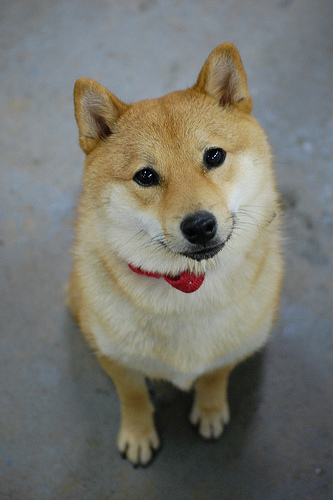

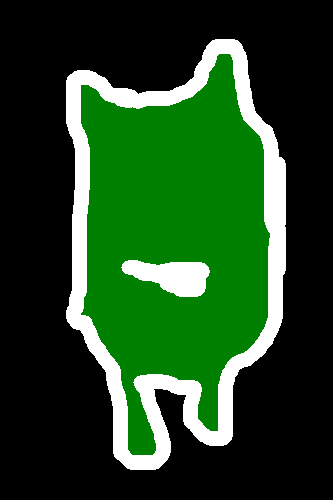

In [62]:
# Original image
image = Image.open("../Dataset/TrainVal/color/shiba_inu_165.jpg")
mask = Image.open("../Dataset/TrainVal/label/shiba_inu_165.png")
display(image, mask)

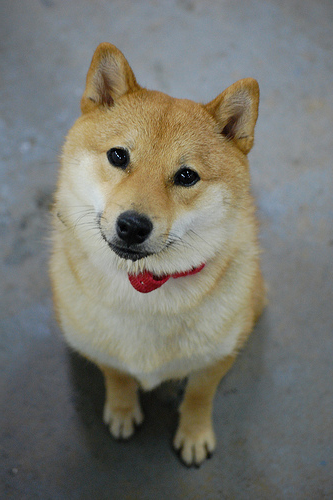

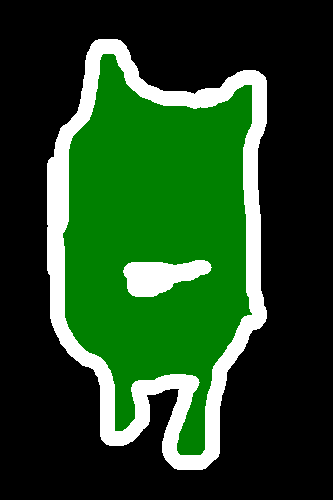

In [63]:
# Horizontal flipping
hflip_image, hflip_mask = flip_horizontal(image, mask)
display(hflip_image, hflip_mask)

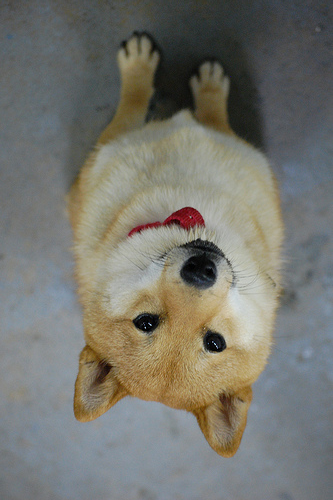

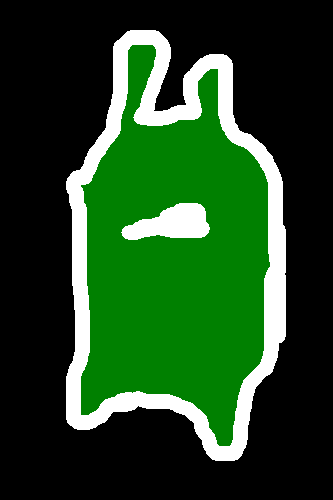

In [64]:
# Vertical flipping
vflip_image, vflip_mask = flip_vertical(image, mask)
display(vflip_image, vflip_mask)

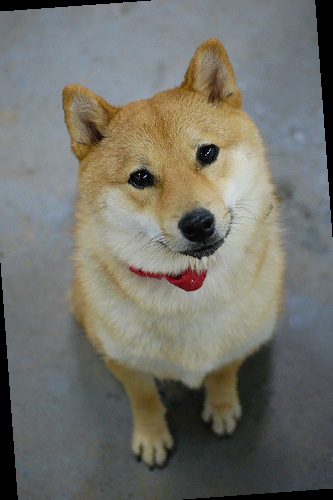

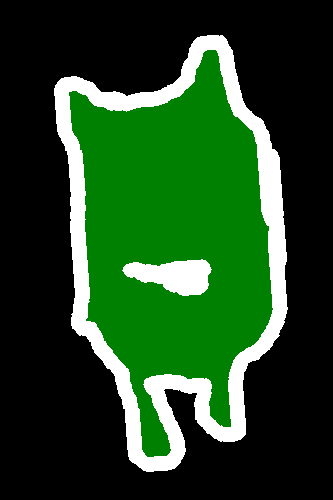

In [65]:
# Rotate
rotated_image, rotated_mask = rotate(image, mask)
display(rotated_image, rotated_mask)

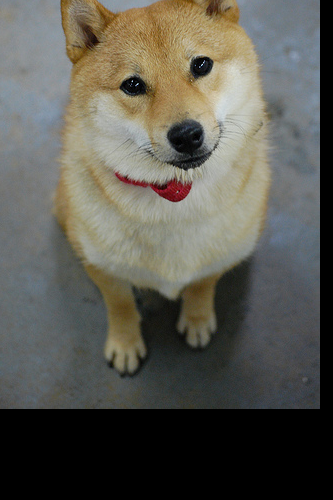

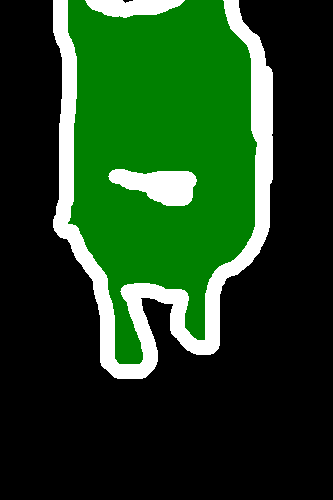

In [67]:
# Translate
translated_image, translated_mask = translate(image, mask)
display(translated_image, translated_mask)

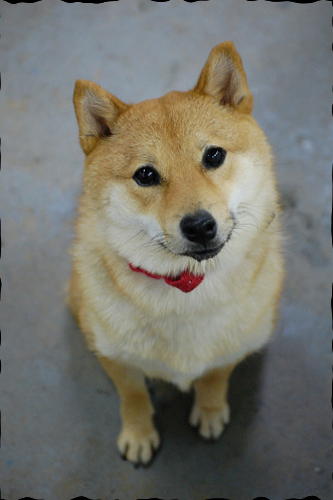

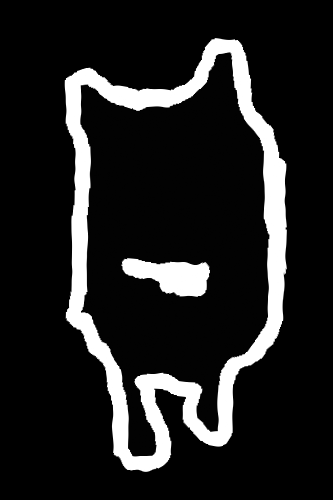

In [70]:
# Elastic transformation
elastic_image, elastic_mask = elastic_transform(image, mask)
display(elastic_image, elastic_mask)

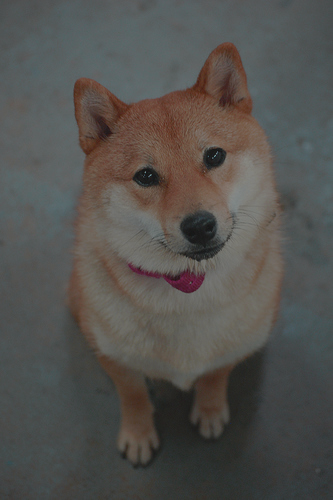

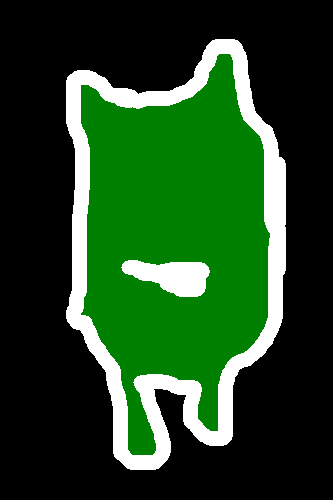

In [72]:
# Color jitter
jitter_image, jitter_mask = color_jitter(image, mask)
display(jitter_image, jitter_mask)

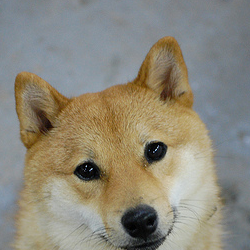

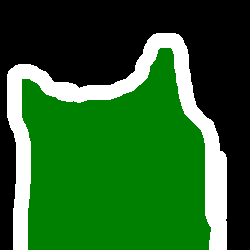

In [75]:
# Random cropping
cropped_image, cropped_mask = random_crop(image, mask, crop_size=(250, 250))
display(cropped_image, cropped_mask)